In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import OrderedDict
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
lexicon = pd.read_csv('AFINN_lexicon.txt', sep = '\t')

In [ ]:
height = lexicon.score.value_counts(sort = False)

Text(0, 0.5, 'Number of Occurences')

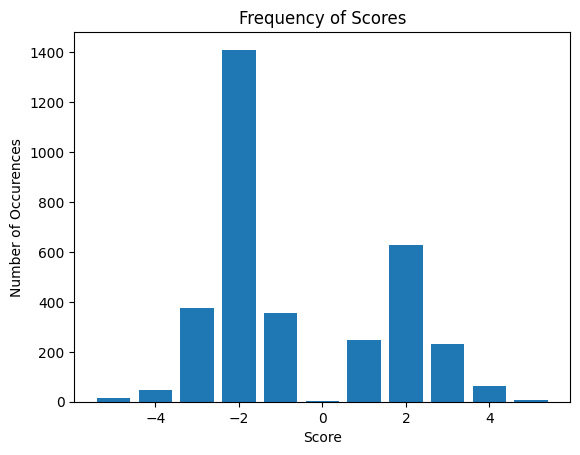

In [ ]:
plt.bar(list(height.index), height = list(height.values))
plt.title("Frequency of Scores")
plt.xlabel("Score")
plt.ylabel("Number of Occurences")

In [ ]:
lexicon.describe()

,score
count,3382.000000
mean,-0.617386
std,2.124552
min,-5.000000
25%,-2.000000
50%,-2.000000
75%,2.000000
max,5.000000


In [ ]:
lexicon_dict = dict(zip(lexicon.Token.values,lexicon.score.values))

##Create the data frame to analyze##

In [ ]:
df = pd.read_csv('listings_asheville.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,108061,https://www.airbnb.com/rooms/108061,20230319041221,2023-03-19,city scrape,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/miso/Hosting-...,320564,...,4.80,4.84,4.49,NaN,f,2,2,0,0,0.66
1,155305,https://www.airbnb.com/rooms/155305,20230319041221,2023-03-19,city scrape,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Pet friendly private cot...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,...,4.74,4.93,4.55,NaN,f,6,1,2,3,2.70
2,156805,https://www.airbnb.com/rooms/156805,20230319041221,2023-03-19,previous scrape,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,...,4.61,4.84,4.46,NaN,t,6,1,2,3,0.48
3,197263,https://www.airbnb.com/rooms/197263,20230319041221,2023-03-19,city scrape,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,961396,...,4.92,4.82,4.98,NaN,f,2,1,1,0,0.51
4,209068,https://www.airbnb.com/rooms/209068,20230319041221,2023-03-19,city scrape,Terrace Cottage,Located in one of Asheville's oldest historic ...,Our beautiful Grove Park Historic District clo...,https://a0.muscache.com/pictures/1829924/9f3bf...,1029919,...,4.98,4.93,4.77,NaN,f,1,1,0,0,0.43


In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.161000e+03,3.161000e+03,3.161000e+03,3161.000000,3161.000000,3161.000000,0.0,3161.000000,3161.000000,3161.000000,...,2916.000000,2916.000000,2916.000000,2916.000000,0.0,3161.000000,3161.000000,3161.000000,3161.000000,2918.000000
mean,1.755521e+17,2.023032e+13,1.427008e+08,38.036697,55.187283,28792.496362,NaN,35.576571,-82.558173,4.520721,...,4.947387,4.934551,4.877936,4.818786,NaN,8.674154,8.249921,0.378994,0.009174,2.596542
std,3.046268e+17,0.000000e+00,1.404253e+08,157.751380,241.383685,30.506506,NaN,0.049050,0.047981,2.834736,...,0.137769,0.134782,0.176834,0.205730,NaN,22.411573,22.482923,1.296290,0.151714,2.160669
min,1.080610e+05,2.023032e+13,1.504900e+04,1.000000,1.000000,28704.000000,NaN,35.422810,-82.691050,1.000000,...,1.000000,3.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.506879e+07,2.023032e+13,2.574990e+07,1.000000,1.000000,28801.000000,NaN,35.561020,-82.592430,2.000000,...,4.950000,4.930000,4.840000,4.760000,NaN,1.000000,1.000000,0.000000,0.000000,0.990000
50%,4.401835e+07,2.023032e+13,9.630593e+07,2.000000,3.000000,28804.000000,NaN,35.587510,-82.557380,4.000000,...,4.980000,4.980000,4.920000,4.860000,NaN,2.000000,1.000000,0.000000,0.000000,2.070000
75%,5.499785e+17,2.023032e+13,2.066904e+08,6.000000,7.000000,28806.000000,NaN,35.606120,-82.521950,6.000000,...,5.000000,5.000000,4.970000,4.940000,NaN,4.000000,3.000000,0.000000,0.000000,3.620000
max,8.493220e+17,2.023032e+13,5.048949e+08,1248.000000,1855.000000,28806.000000,NaN,35.656090,-82.459420,16.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,115.000000,115.000000,9.000000,3.000000,14.660000


In [ ]:
df.columns
# select relevant columns
column = ['id','review_scores_rating','number_of_reviews']
df = df[column]

In [ ]:
df.describe()

,id,review_scores_rating,number_of_reviews
count,3.161000e+03,2918.000000,3161.000000
mean,1.755521e+17,4.878023,95.489402
std,3.046268e+17,0.224171,125.547268
min,1.080610e+05,0.000000,0.000000
25%,2.506879e+07,4.850000,10.000000
50%,4.401835e+07,4.930000,48.000000
75%,5.499785e+17,4.990000,134.000000
max,8.493220e+17,5.000000,1156.000000


In [ ]:
# check for listings with zero reviews
df.iloc[df.number_of_reviews.argmin()]

id                      6775949.0
review_scores_rating          NaN
number_of_reviews             0.0
Name: 60, dtype: float64

In [ ]:
#filter out listings with less than 95 reviews

df_has_ratings = df[df.number_of_reviews >= 95]
df_has_ratings.iloc[df_has_ratings.number_of_reviews.argmin()]

id                      23715234.00
review_scores_rating           4.99
number_of_reviews             95.00
Name: 525, dtype: float64

In [ ]:
# load in the df with the reviews

reviews_df = pd.read_csv('reviews_asheville.csv')
reviews_df = reviews_df[['listing_id','comments']]

In [ ]:
reviews_df

,listing_id,comments
0,108061,"Lisa is superb hostess, she will treat you lik..."
1,108061,This was a lovely little place walking distanc...
2,108061,"Lisa was very nice to work with. However, we ..."
3,108061,I feel very lucky to have found this beautiful...
4,108061,"Great roomy little apartment, beautiful privat..."
...,...,...
301837,760958043751310639,We loved our quaint stay at this location. Had...
301838,761515523247022201,I was recently very fortunate to have the oppo...
301839,761515523247022201,Lovely little house - newly renovated with ple...
301840,761515523247022201,This house was nice and conveniently located. ...


###Feature Extraction

In [ ]:
# add to each listing id all associated reviews as an array with each element being a review

def add_comments(id,reviews_df):
  return reviews_df.comments.loc[reviews_df['listing_id'] == id].values


df_has_ratings['comments_array'] = df_has_ratings.id.apply(lambda x: add_comments(x,reviews_df))

<ipython-input-197-1532578cfa9e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_has_ratings['comments_array'] = df_has_ratings.id.apply(lambda x: add_comments(x,reviews_df))


In [ ]:
df_has_ratings.head()

,id,review_scores_rating,number_of_reviews,comments_array
1,155305,4.59,383,[We had a wonderful time! The cottage was very...
6,259576,4.93,766,[We loved our stay at Julia's studio! The deco...
8,353092,4.85,529,[Athena's loft was an excellent place to stay!...
10,436476,4.90,364,[My husband and I spent the weekend at Heidi's...
11,4394761,4.87,306,[I stayed at April's place for several months ...


In [ ]:
def rtrn_ninetyfive_comments(array_of_comments):
  return list(array_of_comments)[:95]
df_has_ratings['ninetyfive_comments_array'] = df_has_ratings.comments_array.apply(rtrn_ninetyfive_comments)

<ipython-input-199-b1c886ab3671>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_has_ratings['ninetyfive_comments_array'] = df_has_ratings.comments_array.apply(rtrn_ninetyfive_comments)


In [ ]:
df_has_ratings.head()

,id,review_scores_rating,number_of_reviews,comments_array,ninetyfive_comments_array
1,155305,4.59,383,[We had a wonderful time! The cottage was very...,[We had a wonderful time! The cottage was very...
6,259576,4.93,766,[We loved our stay at Julia's studio! The deco...,[We loved our stay at Julia's studio! The deco...
8,353092,4.85,529,[Athena's loft was an excellent place to stay!...,[Athena's loft was an excellent place to stay!...
10,436476,4.90,364,[My husband and I spent the weekend at Heidi's...,[My husband and I spent the weekend at Heidi's...
11,4394761,4.87,306,[I stayed at April's place for several months ...,[I stayed at April's place for several months ...


In [ ]:
df_has_ratings.describe()

,id,review_scores_rating,number_of_reviews
count,1.056000e+03,1056.000000,1056.000000
mean,2.240453e+15,4.896553,228.637311
std,3.641748e+16,0.100486,138.084328
min,1.553050e+05,4.280000,95.000000
25%,1.600145e+07,4.860000,134.000000
50%,2.484358e+07,4.930000,187.500000
75%,3.765346e+07,4.970000,279.250000
max,6.499180e+17,5.000000,1156.000000


In [ ]:
# total num of reviews

num_comments = df_has_ratings.ninetyfive_comments_array.agg(len)
num_comments

1       95
6       95
8       95
10      95
11      95
        ..
3154    95
3155    95
3156    95
3157    95
3160    95
Name: ninetyfive_comments_array, Length: 1056, dtype: int64

In [ ]:
df_has_ratings.ninetyfive_comments_array.agg(len).sum()


100320

In [ ]:
df_has_ratings.head()

,id,review_scores_rating,number_of_reviews,comments_array,ninetyfive_comments_array
1,155305,4.59,383,[We had a wonderful time! The cottage was very...,[We had a wonderful time! The cottage was very...
6,259576,4.93,766,[We loved our stay at Julia's studio! The deco...,[We loved our stay at Julia's studio! The deco...
8,353092,4.85,529,[Athena's loft was an excellent place to stay!...,[Athena's loft was an excellent place to stay!...
10,436476,4.90,364,[My husband and I spent the weekend at Heidi's...,[My husband and I spent the weekend at Heidi's...
11,4394761,4.87,306,[I stayed at April's place for several months ...,[I stayed at April's place for several months ...


In [ ]:
corpus = df_has_ratings.ninetyfive_comments_array.apply(
    lambda x: ' '.join(pd.Series(x).apply(
        lambda x: str(x)
    )))


In [ ]:
vectorizer = TfidfVectorizer(
    stop_words = 'english',
    ngram_range = (1,1),
    max_features = 2000)

In [ ]:
corpus

1       We had a wonderful time! The cottage was very ...
6       We loved our stay at Julia's studio! The decor...
8       Athena's loft was an excellent place to stay! ...
10      My husband and I spent the weekend at Heidi's ...
11      I stayed at April's place for several months a...
                              ...                        
3154    Location!  Hospitality!  Clean!  Cute!\r<br/>\...
3155    Christine was very helpful in the days prior t...
3156    We had a great time staying at the bittersweet...
3157    Everything was wonderful! Molly was awesome an...
3160    Beth was super quick at responding to us.  We ...
Name: ninetyfive_comments_array, Length: 1056, dtype: object

In [ ]:
matrix = vectorizer.fit_transform(list(corpus))

In [ ]:
def sentiment_score(w2i, tokens_separated_by_doc,lexicon_dict):
  score = []

  for doc in tqdm(tokens_separated_by_doc):
    points = 0
    for word in doc:
      if w2i.get(word):
        dict_score = lexicon_dict.get(word,0)
        if dict_score < 0:
          dict_score = dict_score
        points += dict_score

    score.append(points)

  return score

df_has_ratings['sentiment'] = sentiment_score(
    vectorizer.vocabulary_,
    vectorizer.inverse_transform(matrix),
    lexicon_dict,)

100%|██████████| 1056/1056 [00:00<00:00, 1370.96it/s]
<ipython-input-209-df0d67ea4d92>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_has_ratings['sentiment'] = sentiment_score(


In [ ]:
def score_to_cat(review_scores_rating):
  median = np.median(np.array(df_has_ratings['review_scores_rating']))
  if review_scores_rating < median:
    return 0
  else:
    return 1

df_has_ratings['cat'] = df_has_ratings.review_scores_rating.apply(score_to_cat)

<ipython-input-210-d1408eac7233>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_has_ratings['cat'] = df_has_ratings.review_scores_rating.apply(score_to_cat)


##Data Visualization##

In [ ]:
df_has_ratings[df_has_ratings['review_scores_rating'] < 4]

,id,review_scores_rating,number_of_reviews,comments_array,ninetyfive_comments_array,sentiment,cat


In [ ]:
df_has_ratings.cat.value_counts()

1    548
0    508
Name: cat, dtype: int64

Text(0, 0.5, 'Frequency')

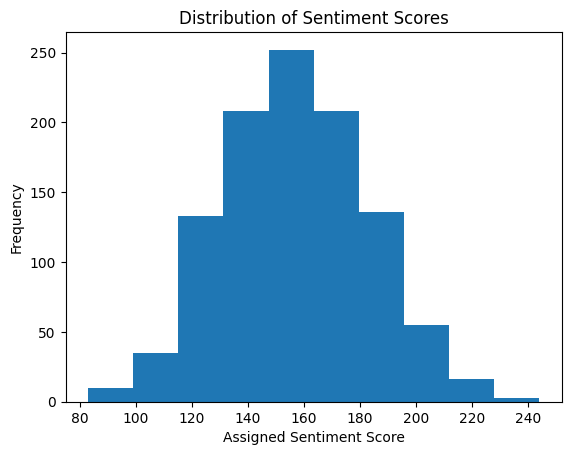

In [ ]:
plt.hist(df_has_ratings['sentiment'],bins = 10)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Assigned Sentiment Score')
plt.ylabel('Frequency')

### Model ###

In [ ]:
df_has_ratings.review_scores_rating.skew(numeric_only = True)

-1.907781618791043

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
X = np.array(df_has_ratings.sentiment).reshape(-1,1)
y = np.array(df_has_ratings.cat).reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .15, random_state = 1)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=15)

In [ ]:
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(confusion_matrix(y_test,preds))

[[46 26]
 [28 59]]


In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        72
           1       0.69      0.68      0.69        87

    accuracy                           0.66       159
   macro avg       0.66      0.66      0.66       159
weighted avg       0.66      0.66      0.66       159



In [ ]:
print(classification_report(np.ones(preds.shape),preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.53      0.70       159

    accuracy                           0.53       159
   macro avg       0.50      0.27      0.35       159
weighted avg       1.00      0.53      0.70       159



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(np.ones(preds.shape),preds))

[[ 0  0]
 [74 85]]


In [ ]:
wrong_bools = y_test!=preds.reshape(-1,1)
wrong_idx = np.array([i for i,x in enumerate(wrong_bools) if x])

In [ ]:
X_test[~wrong_idx].reshape(-1).mean()

154.2037037037037

In [ ]:
X_test[wrong_idx].reshape(-1).mean()


154.44444444444446

In [ ]:
y_test[~wrong_idx].reshape(-1).mean()

0.5370370370370371

In [ ]:
y_test[wrong_idx].reshape(-1).mean()

0.5185185185185185

Text(0.5, 1.0, 'Correct Predictions by Category')

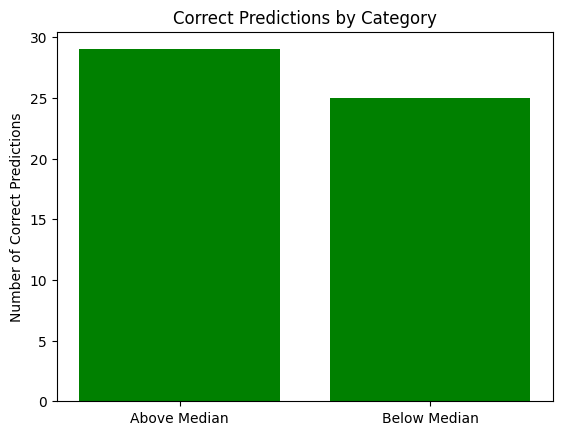

In [ ]:
plt.bar(['Above Median','Below Median'],pd.Series(y_test[~wrong_idx].reshape(-1)).value_counts(), color = 'green')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions by Category')

Text(0.5, 1.0, 'Incorrect Predictions by Category')

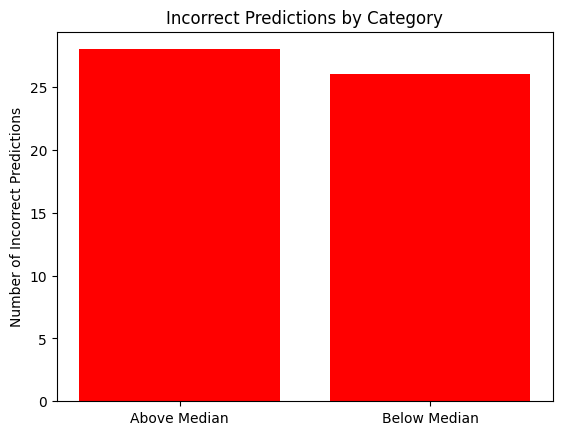

In [ ]:
plt.bar(['Above Median','Below Median'],pd.Series(y_test[wrong_idx].reshape(-1)).value_counts(), color = 'red')
plt.ylabel('Number of Incorrect Predictions')
plt.title('Incorrect Predictions by Category')